In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
%matplotlib inline

In [23]:
ageSource = "ConEdison/NYC_buildings_ages.csv"
leaksSource = "ConEdison/GasHistory_2010_ConEdisonTracts.csv"

In [24]:
buildings_df = pd.read_csv(ageSource, engine='python',error_bad_lines=False)
leaks_df = pd.read_csv(leaksSource, engine='python',error_bad_lines=False)

Skipping line 290470: unexpected end of data


In [25]:
buildings_df.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,dcpedited,notes
0,MN,1,401,101.0,317.03,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,4,20v3,NaN,NaN,1.0,1.0,t,NaN
1,BX,3328,32,207.0,431.00,3000.0,10.0,11.0,10467.0,L039,...,NaN,NaN,1,20v3,7.0,21.0,NaN,NaN,t,NaN
2,BK,1163,37,308.0,305.00,4001.0,17.0,35.0,11238.0,E219,...,NaN,NaN,1,20v3,8.0,36.0,NaN,NaN,t,NaN
3,QN,16174,7502,414.0,942.01,1029.0,27.0,32.0,11694.0,E268,...,4.161740e+09,06/19/2007,1,20v3,14.0,45.0,NaN,1.0,NaN,NaN
4,QN,1229,50,402.0,259.00,2001.0,30.0,26.0,11377.0,E292,...,NaN,NaN,1,20v3,2.0,42.0,NaN,NaN,NaN,NaN


In [26]:
leaks_df.head()

,TicketNumber,Latitude,Longitude,Zip,ClassificationType,Date,Time,Hour,CensusTract_2010,CensusBlock_2010,CountyName_2010,GEOID_2010,CensusTract_2010_ID,CensusTract_2010_NAME,CensusBlock_2010_ID,CensusBlock_2010_NAME
0,ML19001225,40.75402,-73.97419,10017,M,01/21/2019,09:15 PM,09 PM,92.0,1003,New York County,360610092001003,9200,Census Tract 92,1003,Block 1003
1,ML19003831,40.77168,-73.97763,10023,M,03/07/2019,08:40 AM,08 AM,143.0,1040,New York County,360610143001040,14300,Census Tract 143,1040,Block 1040
2,ML19004663,40.75472,-73.97591,10017,M,03/21/2019,07:38 PM,07 PM,92.0,1005,New York County,360610092001005,9200,Census Tract 92,1005,Block 1005
3,ML19005447,40.80325,-73.96749,10025,M,04/04/2019,02:50 PM,02 PM,195.0,1005,New York County,360610195001005,19500,Census Tract 195,1005,Block 1005
4,ML19006608,40.78175,-73.96026,10028,P,04/27/2019,10:15 AM,10 AM,143.0,1024,New York County,360610143001024,14300,Census Tract 143,1024,Block 1024


In [27]:
buildings_df.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude', '

In [28]:
leaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TicketNumber           2623 non-null   object 
 1   Latitude               2623 non-null   float64
 2   Longitude              2623 non-null   float64
 3   Zip                    2623 non-null   int64  
 4   ClassificationType     2623 non-null   object 
 5   Date                   2623 non-null   object 
 6   Time                   2623 non-null   object 
 7   Hour                   2623 non-null   object 
 8   CensusTract_2010       2623 non-null   float64
 9   CensusBlock_2010       2623 non-null   int64  
 10  CountyName_2010        2623 non-null   object 
 11  GEOID_2010             2623 non-null   int64  
 12  CensusTract_2010_ID    2623 non-null   int64  
 13  CensusTract_2010_NAME  2623 non-null   object 
 14  CensusBlock_2010_ID    2623 non-null   int64  
 15  Cens

In [29]:
buildings_df = buildings_df[['address', 'landuse', 'yearbuilt','borough','ct2010', 'cb2010',  'latitude', 'longitude']]

In [30]:
buildings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290468 entries, 0 to 290467
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    290398 non-null  object 
 1   landuse    289751 non-null  float64
 2   yearbuilt  290398 non-null  float64
 3   borough    290468 non-null  object 
 4   ct2010     290086 non-null  float64
 5   cb2010     290086 non-null  float64
 6   latitude   290053 non-null  float64
 7   longitude  290053 non-null  float64
dtypes: float64(6), object(2)
memory usage: 17.7+ MB


In [33]:
# remove all rows where the location or yearBuilt is missing
buildings_df = buildings_df[buildings_df['yearbuilt']>0]
buildings_df = buildings_df.dropna()

leaks_df = leaks_df.dropna()

In [34]:
buildings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279996 entries, 0 to 290467
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    279996 non-null  object 
 1   landuse    279996 non-null  float64
 2   yearbuilt  279996 non-null  float64
 3   borough    279996 non-null  object 
 4   ct2010     279996 non-null  float64
 5   cb2010     279996 non-null  float64
 6   latitude   279996 non-null  float64
 7   longitude  279996 non-null  float64
dtypes: float64(6), object(2)
memory usage: 19.2+ MB


In [35]:
buildings_df.head()

,address,landuse,yearbuilt,borough,ct2010,cb2010,latitude,longitude
0,JOE DIMAGGIO HIGHWAY,7.0,1949.0,MN,317.03,1.0,40.714289,-74.020911
7,146 2 AVENUE,4.0,1900.0,MN,40.00,4000.0,40.729203,-73.986784
10,243 MORELAND STREET,1.0,2019.0,SI,112.02,2015.0,40.573513,-74.098158
12,454 BEACH 125 STREET,1.0,1950.0,QN,934.01,1005.0,40.580536,-73.846269
13,460 BEACH 125 STREET,1.0,1970.0,QN,934.01,1005.0,40.580649,-73.846334


In [36]:
buildings_df['ct2010'] = buildings_df['ct2010']*100
buildings_df['ct2010'] = buildings_df['ct2010'].astype(int)
buildings_df['ct2010'] = buildings_df['ct2010'].astype(str)
buildings_df['cb2010'] = buildings_df['cb2010'].astype(int)
buildings_df['cb2010'] = buildings_df['cb2010'].astype(str)

buildings_df['ctcb2010'] = buildings_df['ct2010'].astype(str) + buildings_df['cb2010'].astype(str)

In [37]:
buildings_df.head()

,address,landuse,yearbuilt,borough,ct2010,cb2010,latitude,longitude,ctcb2010
0,JOE DIMAGGIO HIGHWAY,7.0,1949.0,MN,31702,1,40.714289,-74.020911,317021
7,146 2 AVENUE,4.0,1900.0,MN,4000,4000,40.729203,-73.986784,40004000
10,243 MORELAND STREET,1.0,2019.0,SI,11202,2015,40.573513,-74.098158,112022015
12,454 BEACH 125 STREET,1.0,1950.0,QN,93401,1005,40.580536,-73.846269,934011005
13,460 BEACH 125 STREET,1.0,1970.0,QN,93401,1005,40.580649,-73.846334,934011005


In [38]:
leaks_df.columns = map(str.lower, leaks_df.columns)
leaks_df.columns

Index(['ticketnumber', 'latitude', 'longitude', 'zip', 'classificationtype',
       'date', 'time', 'hour', 'censustract_2010', 'censusblock_2010',
       'countyname_2010', 'geoid_2010', 'censustract_2010_id',
       'censustract_2010_name', 'censusblock_2010_id',
       'censusblock_2010_name'],
      dtype='object')

In [39]:
leaks_df['ctcb2010'] = leaks_df['censustract_2010_id'].astype(str)+leaks_df['censusblock_2010_id'].astype(str)

In [40]:
leaks_df = leaks_df[['ticketnumber', 'classificationtype', 'date', 'countyname_2010', 'latitude', 'longitude', 'ctcb2010']]
leaks_df.head(100)

,ticketnumber,classificationtype,date,countyname_2010,latitude,longitude,ctcb2010
0,ML19001225,M,01/21/2019,New York County,40.75402,-73.97419,92001003
1,ML19003831,M,03/07/2019,New York County,40.77168,-73.97763,143001040
2,ML19004663,M,03/21/2019,New York County,40.75472,-73.97591,92001005
3,ML19005447,M,04/04/2019,New York County,40.80325,-73.96749,195001005
4,ML19006608,P,04/27/2019,New York County,40.78175,-73.96026,143001024
...,...,...,...,...,...,...,...
95,WL18002550,M,02/15/2018,Westchester County,41.03169,-73.86765,113003012
96,WL18009064,M,08/10/2018,Westchester County,41.15131,-73.76978,131023032
97,WL19000217,M,01/07/2019,Westchester County,41.02267,-73.87048,113003025
98,WL19000325,M,01/10/2019,Westchester County,40.91821,-73.82872,40001000


In [41]:
leaks_df['count'] = 1

In [42]:
grouped_leaks_df = leaks_df.groupby('ctcb2010').agg({'count': ['count']})
grouped_leaks_df.head(100)

,count
,count
ctcb2010,
100001001,1
100001004,2
100001020,1
100002000,1
100002016,1
...,...
107012025,2
107014014,1


In [43]:
grouped_leaks_df.columns = grouped_leaks_df.columns.get_level_values(0)
grouped_leaks_df.sort_values(by = 'count', ascending=False)

,count
ctcb2010,
143001033,8
50023013,8
109001007,7
13023000,7
1409011001,7
...,...
1571018013,1
1571014005,1
1571012000,1


In [44]:
buildings_df['count'] = 1
grouped_buildings_df = buildings_df.groupby('ctcb2010').agg({'count': ['count'], 'yearbuilt':['mean']})
grouped_buildings_df.columns = grouped_buildings_df.columns.get_level_values(0)
grouped_buildings_df.sort_values(by = 'count', ascending=False)

,count,yearbuilt
ctcb2010,,
291022000,116,1984.327586
170071000,113,1999.274336
277042000,108,1989.027778
177003001,106,1962.650943
170102000,103,1974.708738
...,...,...
1377002002,1,1949.000000
261004002,1,1924.000000
1377002000,1,1955.000000


In [60]:
grouped_buildings_df.sort_values(by = 'yearbuilt', ascending=False)

,count,yearbuilt
ctcb2010,,
176003031,1,2019.00
51001018,1,2019.00
702011000,1,2019.00
391001002,1,2019.00
509002005,1,2019.00
...,...,...
55022010,4,1820.25
15013003,1,1807.00
136005004,1,1801.00


<h2>Try with FDNY data</h2>

In [45]:
fdny_df = pd.read_csv(r"C:\Users\mskac\projects\GasLeakCombined\DataFiles\FDNY\Geoid_Count2017_18.csv")

In [46]:
fdny_df.head()

,Time,Geoid,NumberOfReports
0,12/2018,36047089000,3
1,12/2018,36081043701,1
2,03/2017,36005022403,2
3,02/2017,36081025400,2
4,05/2017,36081008600,1


In [47]:
fdny_df.columns = map(str.lower, fdny_df.columns)

In [48]:
fdny_df['ctcb2010'] = fdny_df['geoid'].astype(str).str.slice(start=3)

In [49]:
fdny_df['ctcb2010'] = fdny_df['ctcb2010'].str.lstrip("0")

In [50]:
fdny_df['count'] = 1

In [51]:
grouped_fdny_df = fdny_df.groupby('ctcb2010').agg({'count': ['count']})

In [52]:
grouped_fdny_df.columns = grouped_fdny_df.columns.get_level_values(0)
grouped_fdny_df.sort_values(by = 'count', ascending=False)

,count
ctcb2010,
61006600,24
47030700,24
61002400,24
61012900,24
61000600,24
...,...
81018800,1
81015600,1
81015200,1


In [53]:
grouped_fdny_df.head()

,count
ctcb2010,
1003001,2
1041400,2
17007600,9
17341300,3
19001502,2


In [67]:

df_all = pd.merge(grouped_fdny_df, grouped_buildings_df, how='inner', on = 'ctcb2010')

In [68]:
df_all.sort_values(by = 'yearbuilt')

,count_x,count_y,yearbuilt
ctcb2010,,,
5013000,4,9,1868.222222
5011000,17,11,1884.727273
61001002,17,19,1893.631579
85004000,22,12,1909.166667
85002002,6,12,1918.916667
81003000,2,27,1920.037037
81001000,3,19,1920.947368
85002001,6,23,1921.956522
61003002,23,10,1922.000000


In [66]:
df_all.columns = df_all.columns.get_level_values(0)
df_all.columns

Index(['count_x', 'count_y', 'yearbuilt'], dtype='object')

In [71]:
df_all.rename(columns={"count_x": "reported_fdny_accidents", 'yearbuilt': 'avg_year_built'}, inplace=True)

In [72]:
df_all.drop('count_y', axis=1)

,reported_fdny_accidents,avg_year_built
ctcb2010,,
47002000,7,1946.300000
5011000,17,1884.727273
5013000,4,1868.222222
61001001,23,1933.586207
61001002,17,1893.631579
61002000,4,1934.424242
61003001,24,1924.884615
61003002,23,1922.000000
61004000,24,1933.750000


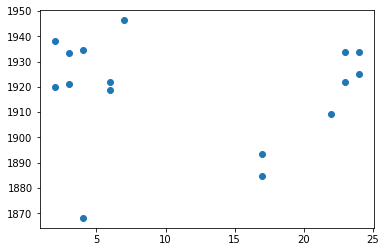

In [73]:
plt.scatter(df_all['reported_fdny_accidents'], df_all['avg_year_built'], marker='o');

In [ ]:
from urllib.request import urlopen                       # Getting the json data from the url
import requests
import json
import pandas as pd                                     # To read and write csv files
import time

csvfile = ageSource


### GETTING CENSUS DATA FROM COORDS AND ADDING TO CSV ####

# FUNCTION: Get Census Tract from Longitude and Latitude coordintes using the Census Beru's API which returns a JSON file
def getCensusTract(longitude, latitude, retryRun=0):  # returns an array [CensusTrack, CensusBlock, CountyName]
    url = "https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={0}&y={1}&benchmark=Public_AR_Census2010&vintage=Census2010_Census2010&format=json".format(
        longitude, latitude)
    if retryRun == 11:  # Failed to get json data 11 times with this longitude and latitude so need to skip this one
        print("failed 11 times")
        return [str(0), str(0)]
    try:
        response = requests.get(url)
        dataJSON = response.json()
        data = dataJSON["result"]
        county = data["geographies"]["Counties"][0]["BASENAME"]
        geoid = data["geographies"]["Census Tracts"][0]["GEOID"]
        #county = data["geographies"]["Counties"][0]["NAME"]
        return [str(county), str(geoid)]
    except:
        retryRun += 1
        print("******** Error on longitude, latitude: " + str(longitude) + "," + str(
            latitude) + " ------ retrying " + str(retryRun))
        return getCensusTract(longitude, latitude, retryRun)  # *****need to return the recursive function


# a) Will modify GasHistory_ConEdison.csv to have the CensusTract, CensusBlock, and CountyName columns

df =  pd.read_csv(ageSource, engine='python',error_bad_lines=False)  # read the csv file and store to df
df["CountyName"] = "0.0"

for row in range(0, len(df)):
    # b) using the lat and long coords of each entry to find the census data and adding to the respective arrays to add to csv col later
    returnArray = getCensusTract(float(df.loc[row]["longitude"].item()),
                                 float(df.loc[row]["latitude"].item()))  # data.iat[i,4] = lat   # data.iat[i,5] = lon
    df.at[row, "CountyName"] = returnArray[0]
    df.at[row, "Geoid2010"] = returnArray[1]
    if row % 100 == 0:
        print(row)

print(df)
df.to_csv("ConEdison/processed.csv", encoding='utf-8',index=False)

Skipping line 290470: unexpected end of data


0
******** Error on longitude, latitude: nan,nan ------ retrying 1
******** Error on longitude, latitude: nan,nan ------ retrying 2
******** Error on longitude, latitude: nan,nan ------ retrying 3
******** Error on longitude, latitude: nan,nan ------ retrying 4
******** Error on longitude, latitude: nan,nan ------ retrying 5
******** Error on longitude, latitude: nan,nan ------ retrying 6
******** Error on longitude, latitude: nan,nan ------ retrying 7
******** Error on longitude, latitude: nan,nan ------ retrying 8
******** Error on longitude, latitude: nan,nan ------ retrying 9
******** Error on longitude, latitude: nan,nan ------ retrying 10
******** Error on longitude, latitude: nan,nan ------ retrying 11
failed 11 times
100
******** Error on longitude, latitude: -73.96357657155029,40.8024355014036 ------ retrying 1
******** Error on longitude, latitude: -73.90603825225641,40.6994529339065 ------ retrying 1
******** Error on longitude, latitude: -73.8406794393324,40.5800430357373 -

# Updated analysis on Pluto data

In [241]:
import pandas as pd
df = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\original\pluto.csv', low_memory=False)

In [242]:
new_columns = ['ct2010','firecomp', 'yearbuilt', 'latitude','longitude']
df = df[new_columns]


In [243]:
df.head()

,ct2010,firecomp,yearbuilt,latitude,longitude
0,236.00,L148,1996.0,40.633103,-73.992420
1,244.02,E151,1999.0,40.502994,-74.238422
2,244.02,E151,1998.0,40.503268,-74.238609
3,244.02,E151,1998.0,40.503279,-74.238336
4,139.00,E040,1986.0,40.767097,-73.989148


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858388 entries, 0 to 858387
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ct2010     856962 non-null  float64
 1   firecomp   856956 non-null  object 
 2   yearbuilt  857772 non-null  float64
 3   latitude   857579 non-null  float64
 4   longitude  857579 non-null  float64
dtypes: float64(4), object(1)
memory usage: 32.7+ MB


In [245]:
df = df.dropna(how='any',axis=0) 

In [246]:
df['ct2010'] = df['ct2010']*100
df['ct2010'] = df['ct2010'].astype(int)
df['yearbuilt'] = df['yearbuilt'].astype(int)

In [247]:
df.head(50)

,ct2010,firecomp,yearbuilt,latitude,longitude
0,23600,L148,1996,40.633103,-73.992420
1,24402,E151,1999,40.502994,-74.238422
2,24402,E151,1998,40.503268,-74.238609
3,24402,E151,1998,40.503279,-74.238336
4,13900,E040,1986,40.767097,-73.989148
5,50803,L147,1908,40.655041,-73.960716
6,17700,E160,0,40.593471,-74.100928
7,27402,E089,1920,40.843065,-73.817837
8,79601,E249,1905,40.657530,-73.959374
9,6900,E262,2017,40.769878,-73.921409


In [248]:
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\pluto_short.csv')

In [249]:
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile
import shapely.wkt

In [250]:
ntadf = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\original\nynta.csv')
ntadf.columns

Index(['CountyFIPS', 'BoroCode', 'the_geom', 'BoroName', 'NTACode', 'NTAName',
       'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [251]:
df.iloc[67630]

ct2010         12101
firecomp        L031
yearbuilt       1901
latitude     40.8279
longitude   -73.8887
Name: 67728, dtype: object

In [252]:
df['nta'] = ''
df['boro'] = ''
df['county'] = ''

In [253]:
for index, row in df[:100000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

Exception ignored in: <function BaseGeometry.__del__ at 0x000001B9E95EB948>
Traceback (most recent call last):
  File "C:\Users\mskac\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 242, in __del__
    self.empty(val=None)
  File "C:\Users\mskac\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 227, in empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
for index, row in df[100000:200000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[200000:300000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[300000:400000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[400000:500000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[500000:600000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[600000:700000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[700000:800000].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [ ]:
for index, row in df[800000:].iterrows():
    point = Point(row['longitude'], row['latitude'])
    for ind, r in ntadf.iterrows():
        coords = r['the_geom']
        poly = shapely.wkt.loads(coords)
        if point.within(poly):
            df.at[index, 'nta'] = r['NTAName']
            df.at[index, 'boro'] = r['BoroName']
            df.at[index, 'county'] = r['CountyFIPS']
            break
df.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\temp_years.csv')
print('done')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856199 entries, 0 to 858387
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ct2010     856199 non-null  int32  
 1   firecomp   856199 non-null  object 
 2   yearbuilt  856199 non-null  int32  
 3   latitude   856199 non-null  float64
 4   longitude  856199 non-null  float64
 5   nta        856199 non-null  object 
 6   boro       856199 non-null  object 
 7   county     856199 non-null  object 
dtypes: float64(2), int32(2), object(4)
memory usage: 92.3+ MB


In [176]:
df['state'] = '36'
df['county'] = df['county'].astype(str).apply(lambda x: x.zfill(3))
df['ct2010'] = df['ct2010'].astype(str).apply(lambda x: x.zfill(6))
df['geoid'] = df['state']+ df['county']+df['ct2010']
columns = ['geoid', 'yearbuilt', 'nta', 'boro']
df = df[columns]
df.head()

,geoid,yearbuilt,nta,boro
0,36047236000,1996,Borough Park,Brooklyn
1,36085244000,1999,Charleston-Richmond Valley-Tottenville,Staten Island
2,36085244000,1998,Charleston-Richmond Valley-Tottenville,Staten Island
3,36085244000,1998,Charleston-Richmond Valley-Tottenville,Staten Island
4,36061139000,1986,Clinton,Manhattan


In [177]:
temp = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data.csv')
temp.head()

,Unnamed: 0,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_year_built,gas_leaks,gas_leaks_per_person,geoid,incident_year,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%
0,0,9.576837,3.60,1953.839431,2,0.000412,36005000200,2013,18.040089,11.210097,72652.0,34.5,19.005197,11.198024,1476,8.5,8.7
1,1,4.164290,3.04,1972.667364,5,0.000936,36005000400,2013,13.519681,7.187678,80733.0,35.2,18.881917,7.821856,1912,5.7,8.3
2,2,1.748072,2.55,1969.786833,11,0.002109,36005001600,2013,33.470437,13.984576,44609.0,39.2,34.035990,15.819751,2043,6.6,4.8
3,3,0.000000,2.60,1966.332772,3,0.001171,36005001900,2013,35.499398,2.406739,42285.0,30.5,44.645006,24.863388,891,18.5,6.7
4,4,6.241611,2.84,1953.933724,42,0.004967,36005002000,2013,28.624161,12.953020,34044.0,35.9,29.798658,9.425260,3161,13.5,5.7


In [178]:
df13=df
df14=df 
df15=df 
df16=df 
df17=df 
df18=df 
df13['year'] = 2013
df13['age'] = df['year'] - df['yearbuilt']
df14['year'] = 2014
df14['age'] = df['year'] - df['yearbuilt']
df15['year'] = 2015
df15['age'] = df['year'] - df['yearbuilt']
df16['year'] = 2016
df16['age'] = df['year'] - df['yearbuilt']
df17['year'] = 2017
df17['age'] = df['year'] - df['yearbuilt']
df18['year'] = 2018
df18['age'] = df['year'] - df['yearbuilt']
frames = [df, df14, df15, df16, df17, df18]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137194 entries, 0 to 858387
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   geoid      object
 1   yearbuilt  int32 
 2   nta        object
 3   boro       object
 4   year       int64 
 5   age        int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 254.8+ MB


In [200]:
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137194 entries, 0 to 858387
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   geoid      object
 1   yearbuilt  int32 
 2   nta        object
 3   boro       object
 4   year       int64 
 5   age        int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 254.8+ MB


In [201]:
df.iloc[5000000]

geoid            36081534000
yearbuilt               1925
nta          Cambria Heights
boro                  Queens
year                    2018
age                       93
Name: 720228, dtype: object

In [ ]:
#df['new_geoid'] = df['geoid'].apply(lambda x: x/10 if len(x) == 12 else x) 

In [189]:
copy = df.groupby(['geoid', 'year']).agg({'nta':'first','boro':'first', 'age': 'mean'}).reset_index()
copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geoid   2067 non-null   object 
 1   year    2067 non-null   int64  
 2   nta     2067 non-null   object 
 3   boro    2067 non-null   object 
 4   age     2067 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 80.9+ KB


In [192]:
copy.iloc[500]

geoid     360471116000
year              2018
nta      East New York
boro          Brooklyn
age            220.778
Name: 500, dtype: object

In [386]:
df1 = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\pluto_carto1.csv')
df2 = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\pluto_carto2.csv')
columns = ['ct2010', 'countyfips', 'boroname', 'ntaname', 'yearbuilt']
df1 = df1[columns]
df2 = df2[columns]

df = pd.concat([df1, df2])
df['ct2010'] = df['ct2010'].astype(str).apply(lambda x: x.zfill(6))
df['countyfips'] = df['countyfips'].astype(str).apply(lambda x: x.zfill(3))
df['state'] = '36'
df['geoid'] = df['state'] + df['countyfips'] + df['ct2010']

df = df[df['yearbuilt'] > 1]


columns = ['geoid', 'yearbuilt', 'ntaname', 'boroname']
df = df[columns]


df13=df
df14=df 
df15=df 
df16=df 
df17=df 
df18=df 
df13['year'] = 2013
df13['age'] = df['year'] - df['yearbuilt']
df13= df13[df13['age'] > 0]
df14['year'] = 2014
df14['age'] = df['year'] - df['yearbuilt']
df14= df14[df14['age'] > 0]
df15['year'] = 2015
df15['age'] = df['year'] - df['yearbuilt']
df15= df15[df15['age'] > 0]
df16['year'] = 2016
df16['age'] = df['year'] - df['yearbuilt']
df16= df16[df16['age'] > 0]
df17['year'] = 2017
df17['age'] = df['year'] - df['yearbuilt']
df17= df17[df17['age'] > 0]
df18['year'] = 2018
df18['age'] = df['year'] - df['yearbuilt']
df18= df18[df18['age'] > 0]
frames = [df13, df14, df15, df16, df17, df18]
df = pd.concat(frames)

In [387]:
copy = df.groupby(['geoid', 'year']).agg({'age': 'mean'}).reset_index()
copy['geoid']=copy['geoid'].astype('int64')
copy['year']=copy['year'].astype('int64')

In [388]:
old = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data.csv')
old.head()

,Unnamed: 0,Unnamed: 0.1,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_bldg_age,gas_leaks,gas_leaks_per_person,geoid,incident_year,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%,avg_year_built
0,0,0,9.576837,3.60,61.371429,2,0.000412,36005000200,2013,18.040089,11.210097,72652.0,34.5,19.005197,11.198024,1476,8.5,8.7,1953.839431
1,1,1,4.164290,3.04,53.669267,5,0.000936,36005000400,2013,13.519681,7.187678,80733.0,35.2,18.881917,7.821856,1912,5.7,8.3,1972.667364
2,2,2,1.748072,2.55,53.719298,11,0.002109,36005001600,2013,33.470437,13.984576,44609.0,39.2,34.035990,15.819751,2043,6.6,4.8,1969.786833
3,3,3,0.000000,2.60,81.918310,3,0.001171,36005001900,2013,35.499398,2.406739,42285.0,30.5,44.645006,24.863388,891,18.5,6.7,1966.332772
4,4,4,6.241611,2.84,73.765727,42,0.004967,36005002000,2013,28.624161,12.953020,34044.0,35.9,29.798658,9.425260,3161,13.5,5.7,1953.933724


In [389]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      11607 non-null  int64  
 1   Unnamed: 0.1                    11607 non-null  int64  
 2   %housh_grandp_resp_for_grandch  11604 non-null  float64
 3   avg_houshold_size               11595 non-null  float64
 4   avg_bldg_age                    11580 non-null  float64
 5   gas_leaks                       11607 non-null  int64  
 6   gas_leaks_per_person            11607 non-null  float64
 7   geoid                           11607 non-null  int64  
 8   incident_year                   11607 non-null  int64  
 9   lonely_housholder%              11604 non-null  float64
 10  lonely_housholder_over65%       11604 non-null  float64
 11  mean_houshold_income            11577 non-null  float64
 12  median_age                      

In [390]:
merged = pd.merge(old, copy,  how='left', left_on=['geoid', 'incident_year'], right_on = ['geoid', 'year'])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11607 entries, 0 to 11606
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      11607 non-null  int64  
 1   Unnamed: 0.1                    11607 non-null  int64  
 2   %housh_grandp_resp_for_grandch  11604 non-null  float64
 3   avg_houshold_size               11595 non-null  float64
 4   avg_bldg_age                    11580 non-null  float64
 5   gas_leaks                       11607 non-null  int64  
 6   gas_leaks_per_person            11607 non-null  float64
 7   geoid                           11607 non-null  int64  
 8   incident_year                   11607 non-null  int64  
 9   lonely_housholder%              11604 non-null  float64
 10  lonely_housholder_over65%       11604 non-null  float64
 11  mean_houshold_income            11577 non-null  float64
 12  median_age                      

In [391]:
merged.rename(columns={"age": "avg_bldg_age"}, inplace=True)
merged.head()

,Unnamed: 0,Unnamed: 0.1,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_bldg_age,gas_leaks,gas_leaks_per_person,geoid,incident_year,lonely_housholder%,...,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%,avg_year_built,year,avg_bldg_age
0,0,0,9.576837,3.60,61.371429,2,0.000412,36005000200,2013,18.040089,...,72652.0,34.5,19.005197,11.198024,1476,8.5,8.7,1953.839431,2013.0,61.371429
1,1,1,4.164290,3.04,53.669267,5,0.000936,36005000400,2013,13.519681,...,80733.0,35.2,18.881917,7.821856,1912,5.7,8.3,1972.667364,2013.0,53.669267
2,2,2,1.748072,2.55,53.719298,11,0.002109,36005001600,2013,33.470437,...,44609.0,39.2,34.035990,15.819751,2043,6.6,4.8,1969.786833,2013.0,53.719298
3,3,3,0.000000,2.60,81.918310,3,0.001171,36005001900,2013,35.499398,...,42285.0,30.5,44.645006,24.863388,891,18.5,6.7,1966.332772,2013.0,81.918310
4,4,4,6.241611,2.84,73.765727,42,0.004967,36005002000,2013,28.624161,...,34044.0,35.9,29.798658,9.425260,3161,13.5,5.7,1953.933724,2013.0,73.765727


In [393]:
columns_titles = ['Unnamed: 0', '%housh_grandp_resp_for_grandch', 'avg_houshold_size',
       'avg_bldg_age', 'gas_leaks', 'gas_leaks_per_person', 'geoid',
       'incident_year', 'lonely_housholder%', 'lonely_housholder_over65%',
       'mean_houshold_income', 'median_age', 'nonfamily_housholds%',
       'not_us_citizen%', 'total_housing_units', 'unemployed%',
       'vacant_housing_units%']
merged=merged[columns_titles]

In [430]:
merged.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data.csv')

In [418]:
df = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data.csv')

In [421]:
cols = ['Unnamed: 0', '%housh_grandp_resp_for_grandch',
       'avg_houshold_size', 'avg_bldg_age', 'gas_leaks',
       'gas_leaks_per_person', 'geoid', 'incident_year', 'lonely_housholder%',
       'lonely_housholder_over65%', 'mean_houshold_income', 'median_age',
       'nonfamily_housholds%', 'not_us_citizen%', 'total_housing_units',
       'unemployed%', 'vacant_housing_units%']
df = df[cols]

In [423]:
df.columns

Index(['Unnamed: 0', '%housh_grandp_resp_for_grandch', 'avg_houshold_size',
       'avg_bldg_age', 'gas_leaks', 'gas_leaks_per_person', 'geoid',
       'incident_year', 'lonely_housholder%', 'lonely_housholder_over65%',
       'mean_houshold_income', 'median_age', 'nonfamily_housholds%',
       'not_us_citizen%', 'total_housing_units', 'unemployed%',
       'vacant_housing_units%'],
      dtype='object')

# Find average age for 2013-2018 combined

In [395]:
df1 = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\pluto_carto1.csv')
df2 = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\pluto_carto2.csv')
columns = ['ct2010', 'countyfips', 'boroname', 'ntaname', 'yearbuilt']
df1 = df1[columns]
df2 = df2[columns]

df = pd.concat([df1, df2])
df['ct2010'] = df['ct2010'].astype(str).apply(lambda x: x.zfill(6))
df['countyfips'] = df['countyfips'].astype(str).apply(lambda x: x.zfill(3))
df['state'] = '36'
df['geoid'] = df['state'] + df['countyfips'] + df['ct2010']

df = df[df['yearbuilt'] > 1]


columns = ['geoid', 'yearbuilt', 'ntaname', 'boroname']
df = df[columns]


df13=df
df14=df 
df15=df 
df16=df 
df17=df 
df18=df 
df13['year'] = 2013
df13['age'] = df['year'] - df['yearbuilt']
df13= df13[df13['age'] > 0]
df14['year'] = 2014
df14['age'] = df['year'] - df['yearbuilt']
df14= df14[df14['age'] > 0]
df15['year'] = 2015
df15['age'] = df['year'] - df['yearbuilt']
df15= df15[df15['age'] > 0]
df16['year'] = 2016
df16['age'] = df['year'] - df['yearbuilt']
df16= df16[df16['age'] > 0]
df17['year'] = 2017
df17['age'] = df['year'] - df['yearbuilt']
df17= df17[df17['age'] > 0]
df18['year'] = 2018
df18['age'] = df['year'] - df['yearbuilt']
df18= df18[df18['age'] > 0]
frames = [df13, df14, df15, df16, df17, df18]
df = pd.concat(frames)

In [396]:
df.head()

,geoid,yearbuilt,ntaname,boroname,year,age
0,36005027402,1993,Pelham Bay-Country Club-City Island,Bronx,2013,20
1,36005027402,1970,Pelham Bay-Country Club-City Island,Bronx,2013,43
3,36005027402,1920,Pelham Bay-Country Club-City Island,Bronx,2013,93
4,36005027402,1960,Pelham Bay-Country Club-City Island,Bronx,2013,53
5,36005027401,1930,Pelham Bay-Country Club-City Island,Bronx,2013,83


In [397]:
df['count'] = 1
df = df.groupby(['geoid']).agg({'age': 'sum', 'count': 'sum'}).reset_index()
df['geoid']=df['geoid'].astype('int64')
df['avg_bldg_age'] = df['age']/df['count']

In [407]:
df.head(15)

,geoid,age,count,avg_bldg_age
0,36005000100,495,6,82.500000
1,36005000200,321913,5041,63.858957
2,36005000400,216644,4107,52.749939
3,36005001600,115362,2052,56.219298
4,36005001900,179868,2160,83.272222
5,36005002000,210986,2779,75.921555
6,36005002300,5205,66,78.863636
7,36005002400,10,4,2.500000
8,36005002500,71733,858,83.604895
9,36005002701,15715,181,86.823204


In [410]:
old = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data_all_years.csv')


In [411]:
cols = ['Unnamed: 0', '%housh_grandp_resp_for_grandch',
       'avg_houshold_size', 'gas_leaks',
       'gas_leaks_per_person', 'geoid', 'lonely_housholder%',
       'lonely_housholder_over65%', 'mean_houshold_income', 'median_age',
       'nonfamily_housholds%', 'not_us_citizen%', 'total_housing_units',
       'unemployed%', 'vacant_housing_units%']
old = old[cols]

In [412]:
merged = pd.merge(old, df,  how='left', on = 'geoid')

#merged.rename(columns={"age": "avg_bldg_age"}, inplace=True)

In [413]:
merged.columns

Index(['Unnamed: 0', '%housh_grandp_resp_for_grandch', 'avg_houshold_size',
       'gas_leaks', 'gas_leaks_per_person', 'geoid', 'lonely_housholder%',
       'lonely_housholder_over65%', 'mean_houshold_income', 'median_age',
       'nonfamily_housholds%', 'not_us_citizen%', 'total_housing_units',
       'unemployed%', 'vacant_housing_units%', 'age', 'count', 'avg_bldg_age'],
      dtype='object')

In [414]:
columns_titles = ['Unnamed: 0', '%housh_grandp_resp_for_grandch', 'avg_houshold_size',
       'avg_bldg_age', 'gas_leaks', 'gas_leaks_per_person', 'geoid',
       'lonely_housholder%', 'lonely_housholder_over65%',
       'mean_houshold_income', 'median_age', 'nonfamily_housholds%',
       'not_us_citizen%', 'total_housing_units', 'unemployed%',
       'vacant_housing_units%']
merged=merged[columns_titles]

In [415]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2051 non-null   int64  
 1   %housh_grandp_resp_for_grandch  2051 non-null   float64
 2   avg_houshold_size               2045 non-null   float64
 3   avg_bldg_age                    2046 non-null   float64
 4   gas_leaks                       2051 non-null   int64  
 5   gas_leaks_per_person            2051 non-null   float64
 6   geoid                           2051 non-null   int64  
 7   lonely_housholder%              2051 non-null   float64
 8   lonely_housholder_over65%       2051 non-null   float64
 9   mean_houshold_income            2039 non-null   float64
 10  median_age                      2041 non-null   float64
 11  nonfamily_housholds%            2051 non-null   float64
 12  not_us_citizen%                 20

In [427]:
merged.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data_all_years.csv')


In [417]:
merged.head()

,Unnamed: 0,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_bldg_age,gas_leaks,gas_leaks_per_person,geoid,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%
0,0,5.553494,3.730000,63.858957,38,0.001258,36005000200,17.439703,8.188002,75457.166667,38.300000,20.519481,13.337968,8880,4.217565,8.952703
1,1,1.970487,3.031667,52.749939,49,0.001425,36005000400,16.311743,5.876116,85459.333333,38.016667,21.525139,7.444241,12399,3.986740,8.726510
2,2,0.826587,2.815000,56.219298,99,0.002862,36005001600,27.158074,13.583298,47136.666667,37.466667,27.942054,16.517315,12290,3.173961,4.515867
3,3,2.451161,2.425000,83.272222,38,0.002377,36005001900,37.670475,1.787689,47365.333333,31.333333,47.806856,15.832604,5763,8.438634,5.847649
4,4,4.998347,2.981667,75.921555,314,0.005806,36005002000,29.499614,13.126860,34932.000000,33.416667,30.342775,9.354833,19106,5.571479,5.024600


In [437]:
total = pd.read_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data_all_years.csv')

In [438]:
total.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace=True)

In [439]:
total.head()

,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_bldg_age,gas_leaks,gas_leaks_per_person,geoid,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%
0,5.553494,3.730000,63.858957,38,0.001258,36005000200,17.439703,8.188002,75457.166667,38.300000,20.519481,13.337968,8880,4.217565,8.952703
1,1.970487,3.031667,52.749939,49,0.001425,36005000400,16.311743,5.876116,85459.333333,38.016667,21.525139,7.444241,12399,3.986740,8.726510
2,0.826587,2.815000,56.219298,99,0.002862,36005001600,27.158074,13.583298,47136.666667,37.466667,27.942054,16.517315,12290,3.173961,4.515867
3,2.451161,2.425000,83.272222,38,0.002377,36005001900,37.670475,1.787689,47365.333333,31.333333,47.806856,15.832604,5763,8.438634,5.847649
4,4.998347,2.981667,75.921555,314,0.005806,36005002000,29.499614,13.126860,34932.000000,33.416667,30.342775,9.354833,19106,5.571479,5.024600


In [440]:
total.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\Merged_asc_fdny_data_all_years.csv')